# Wstęp teoretyczny

Na wykładzie opowiedzieliśmy o przetwarzaniu danych tekstowych. Poznalismy przydatne funkcje:
* `napis.startswith(sekw)` - sprawdza czy w napis zaczyna się od sekw  
* `napis.count(sekw)` - zlicza ilość wsytępowania sekw w napisie
* `napis.find(sekw)` - zwraca indeks pierwszego wystąpienia sekw w napisie
* `napis.rfind(sekw)` - podobnie jak wyżej ale od końca
* `napis.replace(sekw1, sekw2)` - zmienia sekw1 na sekw2 w napisie
* `napis.strip()` - usuwa znak biały

Aby wyszukać sprecyzowany przez nas ciąg znaków w stringu używamy wyrażeń regularnych.  
Aby stworzyć wyrażenie regularne korzystamy z biblioteki `re` i funkcji ```re.compile```. 
Do tworzenia wyrażeń regularnych używa się kwantyfikatorów wykorzystywane w celu powtórzenia jakiegoś podwyrażenia: 
+ `.`  dowolny znak
+ `^`  początek lini
+ `$`  koniec lini
+ `*` zero lub wiecej wystąpień
+ `+` jedno lub wiecej wystąpień
+ `{n}` n systąpień
+ `[abs]` grupa znaków a,b lub c
+ `[A-Z]` zakres znaków od a do z
+ `[1-9]` zakres znaków od 1 do 9

Póżniej po przygotowaniu takiego wyrażenia możemy go znaleść w stringu przez funkcje ```findall```.
Przykład:
```python
tekst = s.findall(wyrażenie)
```
Ramki danych rozbudowane są też do funkcjonalności w ramkach danych gdzie używa się funkcji ```contains```.  
Przykład:
``` python
df[df["kolumna"].str.contains("wyrażenie)]
```


# Zadanie 1

In [372]:
import re
import pandas as pd

In [373]:
dane = '''PAC_ID DISEASE OB PULSE CODE_MED
ID-21AA 211-3A1 10.0 q1 AA123_nnn11
ID-22AB 2A1-341 12.0 110 BA133_nnn13
ID-23AB 2B1-341 7.0 110 AA124_nnn11
ID-24AB 2C1-341 2.0 160 CA123_nnn16
AD-25AB 211-3B1 1.0 90 BA153_nnn17
AD-26AB 211-3C1 13.0 80 CA123_nnn15
AD-ADAA 211-3C1 11.0 q0 CA123_nnn15 '''

In [374]:
row=dane.split("\n")
row

['PAC_ID DISEASE OB PULSE CODE_MED',
 'ID-21AA 211-3A1 10.0 q1 AA123_nnn11',
 'ID-22AB 2A1-341 12.0 110 BA133_nnn13',
 'ID-23AB 2B1-341 7.0 110 AA124_nnn11',
 'ID-24AB 2C1-341 2.0 160 CA123_nnn16',
 'AD-25AB 211-3B1 1.0 90 BA153_nnn17',
 'AD-26AB 211-3C1 13.0 80 CA123_nnn15',
 'AD-ADAA 211-3C1 11.0 q0 CA123_nnn15 ']

In [375]:
kolumny = row[1].split(" ")
kolumny

['ID-21AA', '211-3A1', '10.0', 'q1', 'AA123_nnn11']

In [376]:
pac = re.compile("ID.*AB")
pac_id = re.findall(pac,dane)
pac_id

['ID-22AB', 'ID-23AB', 'ID-24AB']

In [377]:
pac2 = re.compile("\d+\.0")
pac_ob = re.findall(pac2,dane)
pac_ob

['10.0', '12.0', '7.0', '2.0', '1.0', '13.0', '11.0']

In [378]:
pac3 = re.compile(' \d+ ')
pac_puls = re.findall(pac3,dane)
pac_puls

[' 110 ', ' 110 ', ' 160 ', ' 90 ', ' 80 ']

In [379]:
pac4 = re.compile("[A-B]+\d+\_nnn\d+")
pac_d = re.findall(pac4,dane)
pac_d

['AA123_nnn11',
 'BA133_nnn13',
 'AA124_nnn11',
 'A123_nnn16',
 'BA153_nnn17',
 'A123_nnn15',
 'A123_nnn15']

In [380]:
pac5 = re.compile("q\d+")
pac_bad_pulse = re.findall(pac5,dane)
pac_bad_pulse 

['q1', 'q0']

In [381]:
pac6 = re.compile("[A-Z]{2}-[1-9][{2}[A-Z]{2}")
pac_big= re.findall(pac6,dane)
pac_big 

['ID-22A']

Tu użyliśmy wyrażeń regularnych do wypisania szukanych przez nas ciagów znaków.

# zadanie 2

In [382]:
dane = '''Dane: Anna Kowalska
Astronomia    2003    jesien   10    5.0
Matematyka I    2003    jesien    10    4.5
Algebra    2003    jesien    10    3.5
Matematyka II    2003    lato    10    4.0
Histologia    2003    lato    5    4.0
Anatomia    2003    lato    5    4.0
Chemia    2003    lato    5    4.0
Fizjologia    2003    lato    5    4.0

Dane: Marcin Kowal
Astronomia    2003    jesien   10    3.0
Matematyka I    2003    jesien    10    3.5
Algebra    2003    jesien    10    3.0
Matematyka II    2003    lato    10    4.0
Histologia    2003    lato    5    4.0
Anatomia    2003    lato    5    3.0
Chemia    2003    lato    5    4.0
Fizjologia    2003    lato    5    3.0

Dane: Mkichal Kowalczyk
Astronomia    2003    jesien   10    4.0
Matematyka I    2003    jesien    10    3.0
Algebra    2003    jesien    10    3.0
Matematyka II    2003    lato    10    5.0
Histologia    2003    lato    5    2.0
Anatomia    2003    lato    5    3.0
Chemia    2003    lato    5    3.0
Fizjologia    2003    lato    5    3.0'''

In [383]:
people = {}
podział = dane.split("\n\n")

In [384]:
for p in podział:
    imie = p.split("\n")[0].split(":")[1].strip()
    people[imie]={}
    for line in p.split("\n")[1:]:
        lista = line.split()
        people[imie][lista[0]]=lista[1:]
    
people

{'Anna Kowalska': {'Astronomia': ['2003', 'jesien', '10', '5.0'],
  'Matematyka': ['II', '2003', 'lato', '10', '4.0'],
  'Algebra': ['2003', 'jesien', '10', '3.5'],
  'Histologia': ['2003', 'lato', '5', '4.0'],
  'Anatomia': ['2003', 'lato', '5', '4.0'],
  'Chemia': ['2003', 'lato', '5', '4.0'],
  'Fizjologia': ['2003', 'lato', '5', '4.0']},
 'Marcin Kowal': {'Astronomia': ['2003', 'jesien', '10', '3.0'],
  'Matematyka': ['II', '2003', 'lato', '10', '4.0'],
  'Algebra': ['2003', 'jesien', '10', '3.0'],
  'Histologia': ['2003', 'lato', '5', '4.0'],
  'Anatomia': ['2003', 'lato', '5', '3.0'],
  'Chemia': ['2003', 'lato', '5', '4.0'],
  'Fizjologia': ['2003', 'lato', '5', '3.0']},
 'Mkichal Kowalczyk': {'Astronomia': ['2003', 'jesien', '10', '4.0'],
  'Matematyka': ['II', '2003', 'lato', '10', '5.0'],
  'Algebra': ['2003', 'jesien', '10', '3.0'],
  'Histologia': ['2003', 'lato', '5', '2.0'],
  'Anatomia': ['2003', 'lato', '5', '3.0'],
  'Chemia': ['2003', 'lato', '5', '3.0'],
  'Fizjologi

In [385]:
data = pd.DataFrame(people)
data.T

,Astronomia,Matematyka,Algebra,Histologia,Anatomia,Chemia,Fizjologia
Anna Kowalska,"[2003, jesien, 10, 5.0]","[II, 2003, lato, 10, 4.0]","[2003, jesien, 10, 3.5]","[2003, lato, 5, 4.0]","[2003, lato, 5, 4.0]","[2003, lato, 5, 4.0]","[2003, lato, 5, 4.0]"
Marcin Kowal,"[2003, jesien, 10, 3.0]","[II, 2003, lato, 10, 4.0]","[2003, jesien, 10, 3.0]","[2003, lato, 5, 4.0]","[2003, lato, 5, 3.0]","[2003, lato, 5, 4.0]","[2003, lato, 5, 3.0]"
Mkichal Kowalczyk,"[2003, jesien, 10, 4.0]","[II, 2003, lato, 10, 5.0]","[2003, jesien, 10, 3.0]","[2003, lato, 5, 2.0]","[2003, lato, 5, 3.0]","[2003, lato, 5, 3.0]","[2003, lato, 5, 3.0]"


Przy użyciu wyrażeń regularnych pobraliśmy dane i wpisaliśmy je w słowik i po tym w ramkę danych.

# Zadanie 3

In [386]:
airl = pd.read_csv("airlines.csv")
airl

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.
5,6,EV,ExpressJet Airlines Inc.
6,7,F9,Frontier Airlines Inc.
7,8,FL,AirTran Airways Corporation
8,9,HA,Hawaiian Airlines Inc.
9,10,MQ,Envoy Air


In [387]:
airl[airl["carrier"].str.contains("[A-Z][1-9]")]

,Unnamed: 0,carrier,name
3,4,B6,JetBlue Airways
6,7,F9,Frontier Airlines Inc.


In [466]:
airl[airl["carrier"].str.contains("^[W|X|Y]")]

,Unnamed: 0,carrier,name
14,15,WN,Southwest Airlines Co.
15,16,YV,Mesa Airlines Inc.


In [389]:
airl[airl["name"].str.contains("\\bAir\\b")]

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
4,5,DL,Delta Air Lines Inc.
9,10,MQ,Envoy Air
11,12,UA,United Air Lines Inc.


In [390]:
airp = pd.read_csv("airports.csv")
airp

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A
1,2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-5,A
2,3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A
3,4,06N,Randall Airport,41.431912,-74.391561,523,-5,A
4,5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-4,A
...,...,...,...,...,...,...,...,...
1392,1393,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A
1393,1394,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A
1394,1395,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A
1395,1396,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A


In [391]:
airp[(airp["lat"]>41) & (airp["lat"]<42)]

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A
2,3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A
3,4,06N,Randall Airport,41.431912,-74.391561,523,-5,A
6,7,0G6,Williams County Airport,41.467306,-84.506778,730,-5,A
17,18,1CS,Clow International Airport,41.695974,-88.129231,670,-6,U
...,...,...,...,...,...,...,...,...
1355,1356,WST,Westerly State Airport,41.349722,-71.803333,81,-5,A
1377,1378,YNG,Youngstown Warren Rgnl,41.260736,-80.679097,1196,-5,A
1386,1387,ZRT,Hartford Union Station,41.768880,-72.681500,0,-5,A
1390,1391,ZTF,Stamford Amtrak Station,41.046937,-73.541493,0,-5,A


In [392]:
airp[(airp["lon"]>-112) & (airp["lon"]<-111)]

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
30,31,36U,Heber City Municipal Airport,40.481806,-111.428806,5637,-6,A
71,72,A39,Phoenix Regional Airport,32.991699,-111.920998,1300,-7,A
152,153,AVW,Marana Regional,32.409556,-111.218388,2031,-7,U
154,155,AZA,Phoenix-Mesa Gateway,33.307833,-111.655000,1382,-7,N
237,238,BZN,Gallatin Field,45.777643,-111.160151,4500,-7,A
271,272,CGZ,Casa Grande Municipal Airport,32.954889,-111.766832,1464,-7,U
451,452,FFZ,Mesa Falcon Field,33.460800,-111.727997,1394,-7,A
456,457,FLG,Flagstaff Pulliam Airport,35.140318,-111.669239,7015,-7,N
532,533,GTF,Great Falls Intl,47.482000,-111.370689,3677,-7,A
557,558,HIF,Hill Afb,41.123939,-111.973039,4789,-7,A


In [393]:
airp[(airp["lon"]>-77) & (airp["lon"]<-76) & (airp["lat"]>38) & (airp["lat"]<39)]

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
87,88,ADW,Andrews Afb,38.810806,-76.867028,280,-5,A
120,121,ANP,Lee Airport,38.942778,-76.568333,34,-5,A
427,428,ESN,Easton-Newnam Field Airport,38.804167,-76.069000,72,-5,A
915,916,NHK,Patuxent River Nas,38.285981,-76.411781,39,-5,A
1387,1388,ZRZ,New Carrollton Rail Station,38.948000,-76.871900,39,-5,A


In [394]:
airp[airp["faa"].str.contains("[A-Z][1-9]{2}")]

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
71,72,A39,Phoenix Regional Airport,32.991699,-111.920998,1300,-7,A
239,240,C16,Frasca Field,40.144979,-88.200197,735,-6,A
240,241,C47,Portage Municipal Airport,43.560314,-89.482861,825,-6,U
241,242,C65,Plymouth Municipal Airport,41.365131,-86.300257,800,-5,A
242,243,C89,Sylvania Airport,42.703250,-87.958972,785,-6,A
243,244,C91,Dowagiac Municipal Airport,41.992934,-86.128012,748,-5,U
378,379,E25,Wickenburg Municipal Airport,33.968899,-112.799004,2377,-7,A
379,380,E51,Bagdad Airport,34.595853,-113.170195,4183,-7,A
380,381,E55,Ocean Ridge Airport,38.801611,-123.530639,940,-8,A
381,382,E63,Gila Bend Municipal Airport,32.960169,-112.673636,789,-7,U


In [395]:
airp[airp["alt"]>1000 ]

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst
0,1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A
5,6,0A9,Elizabethton Municipal Airport,36.371222,-82.173417,1593,-4,A
12,13,17G,Port Bucyrus-Crawford County Airport,40.781556,-82.974806,1003,-5,A
14,15,1A3,Martin Campbell Field Airport,35.015806,-84.346833,1789,-4,A
18,19,1G3,Kent State Airport,41.151389,-81.415111,1134,-4,A
...,...,...,...,...,...,...,...,...
1375,1376,YKM,Yakima Air Terminal McAllister Field,46.568200,-120.544000,1095,-8,A
1376,1377,YKN,Chan Gurney,42.871100,-97.396900,1200,-6,A
1377,1378,YNG,Youngstown Warren Rgnl,41.260736,-80.679097,1196,-5,A
1389,1390,ZSY,Scottsdale Airport,33.622889,-111.910528,1519,-7,A


In [425]:
flights = pd.read_csv("flights.txt",delimiter=",",index_col=0)
flights

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200800,2013,5,8,2221.0,93.0,12.0,105.0,EV,N27962,4459,EWR,GSO,65.0,445,22.0,21.0
200801,2013,5,8,2222.0,202.0,2329.0,194.0,US,N754UW,2187,LGA,DCA,43.0,214,22.0,22.0
200802,2013,5,8,2223.0,173.0,2328.0,154.0,EV,N835AS,5769,LGA,IAD,39.0,229,22.0,23.0
200803,2013,5,8,2226.0,132.0,202.0,158.0,UA,N845UA,729,EWR,MIA,158.0,1085,22.0,26.0


In [426]:
flights[flights["arr_delay"]>0]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200800,2013,5,8,2221.0,93.0,12.0,105.0,EV,N27962,4459,EWR,GSO,65.0,445,22.0,21.0
200801,2013,5,8,2222.0,202.0,2329.0,194.0,US,N754UW,2187,LGA,DCA,43.0,214,22.0,22.0
200802,2013,5,8,2223.0,173.0,2328.0,154.0,EV,N835AS,5769,LGA,IAD,39.0,229,22.0,23.0
200803,2013,5,8,2226.0,132.0,202.0,158.0,UA,N845UA,729,EWR,MIA,158.0,1085,22.0,26.0


In [429]:
flights.pivot_table("arr_delay",index="year",columns="carrier",aggfunc=max)

carrier,9E,AA,AS,B6,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,WN,YV
year,,,,,,,,,,,,,,,,
2013,744.0,878.0,198.0,497.0,931.0,538.0,834.0,436.0,1272.0,1109.0,107.0,435.0,360.0,408.0,422.0,381.0


In [432]:
flights["average_speed"] = 1000*flights.distance/flights.air_time/60
flights["average_speed"]

1         102.790015
2         103.964758
3         113.437500
4         143.533698
5         109.482759
             ...    
200800    114.102564
200801     82.945736
200802     97.863248
200803    114.451477
200804    122.727273
Name: average_speed, Length: 200804, dtype: float64

In [442]:
flights[flights["tailnum"].str.contains("^N\d.",na=False)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,average_speed
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,102.790015
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,103.964758
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,113.437500
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,143.533698
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,109.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200800,2013,5,8,2221.0,93.0,12.0,105.0,EV,N27962,4459,EWR,GSO,65.0,445,22.0,21.0,114.102564
200801,2013,5,8,2222.0,202.0,2329.0,194.0,US,N754UW,2187,LGA,DCA,43.0,214,22.0,22.0,82.945736
200802,2013,5,8,2223.0,173.0,2328.0,154.0,EV,N835AS,5769,LGA,IAD,39.0,229,22.0,23.0,97.863248
200803,2013,5,8,2226.0,132.0,202.0,158.0,UA,N845UA,729,EWR,MIA,158.0,1085,22.0,26.0,114.451477


In [443]:
flights[flights["tailnum"].str.contains("^N\d\d.",na=False)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,average_speed
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,102.790015
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,103.964758
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,113.437500
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,143.533698
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,109.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200800,2013,5,8,2221.0,93.0,12.0,105.0,EV,N27962,4459,EWR,GSO,65.0,445,22.0,21.0,114.102564
200801,2013,5,8,2222.0,202.0,2329.0,194.0,US,N754UW,2187,LGA,DCA,43.0,214,22.0,22.0,82.945736
200802,2013,5,8,2223.0,173.0,2328.0,154.0,EV,N835AS,5769,LGA,IAD,39.0,229,22.0,23.0,97.863248
200803,2013,5,8,2226.0,132.0,202.0,158.0,UA,N845UA,729,EWR,MIA,158.0,1085,22.0,26.0,114.451477


In [444]:
flights[flights["tailnum"].str.contains("^N\d\d\d.",na=False)]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,average_speed
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,102.790015
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,103.964758
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,113.437500
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,143.533698
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,109.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200800,2013,5,8,2221.0,93.0,12.0,105.0,EV,N27962,4459,EWR,GSO,65.0,445,22.0,21.0,114.102564
200801,2013,5,8,2222.0,202.0,2329.0,194.0,US,N754UW,2187,LGA,DCA,43.0,214,22.0,22.0,82.945736
200802,2013,5,8,2223.0,173.0,2328.0,154.0,EV,N835AS,5769,LGA,IAD,39.0,229,22.0,23.0,97.863248
200803,2013,5,8,2226.0,132.0,202.0,158.0,UA,N845UA,729,EWR,MIA,158.0,1085,22.0,26.0,114.451477


In [438]:
flights[flights["carrier"].str.contains("[A-Z][1-9]")]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,average_speed
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,143.533698
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0,112.341772
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0,112.380952
11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0,114.988814
12,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0,106.012658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200774,2013,5,8,2150.0,212.0,103.0,223.0,B6,N592JB,35,JFK,PBI,142.0,1028,21.0,50.0,120.657277
200782,2013,5,8,2200.0,90.0,2354.0,97.0,B6,N296JB,917,JFK,ORD,113.0,740,22.0,0.0,109.144543
200787,2013,5,8,2205.0,80.0,2328.0,89.0,B6,N265JB,1178,EWR,BOS,40.0,200,22.0,5.0,83.333333
200790,2013,5,8,2209.0,170.0,117.0,177.0,B6,N789JB,155,JFK,MCO,136.0,944,22.0,9.0,115.686275


In [398]:
planes = pd.read_csv("planes.csv")
planes

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,2,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,3,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,4,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...
3317,3318,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,3319,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,3320,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,3321,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [399]:
planes[planes["model"].str.contains("^[1-9]{3}-[1-9]{3}")]

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
34,35,N11206,2000.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
49,50,N1200K,1998.0,Fixed wing multi engine,BOEING,767-332,2,330,NaN,Turbo-fan
50,51,N1201P,1998.0,Fixed wing multi engine,BOEING,767-332,2,330,NaN,Turbo-fan
51,52,N12109,1994.0,Fixed wing multi engine,BOEING,757-224,2,178,NaN,Turbo-jet
52,53,N12114,1995.0,Fixed wing multi engine,BOEING,757-224,2,178,NaN,Turbo-jet
...,...,...,...,...,...,...,...,...,...,...
2829,2830,N87507,2008.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2830,2831,N87512,2008.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2831,2832,N87513,2008.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan
2833,2834,N87527,2010.0,Fixed wing multi engine,BOEING,737-824,2,149,NaN,Turbo-fan


In [400]:
planes[planes["model"].str.contains("^[A-Z][1-9]{3}-[1-9]{3}")]

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
215,216,N150UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan
216,217,N151UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan
218,219,N152UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan
221,222,N153UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan
223,224,N154UW,2013.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...
3147,3148,N943FR,2005.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3169,3170,N948FR,2006.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3182,3183,N951FR,2009.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan
3187,3188,N952FR,2010.0,Fixed wing multi engine,AIRBUS,A319-112,2,100,NaN,Turbo-fan


In [401]:
planes[planes["model"].str.contains("^[A-Z]{3}-[1-9]{3}[A-Z]{2}")]

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
4,5,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
10,11,N11106,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
11,12,N11107,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
12,13,N11109,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...
787,788,N34110,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
788,789,N34111,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
912,913,N36915,2001.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
1153,1154,N41104,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


Dla poszczególnych danych związanych z szerokim pojęciem lotów samolotów używaliśmy wyrażeń regularnych i funkcji contains. Dość pracochłonne zadanie. Jak i wiele danych do prześledzenia.

# Zadanie 4

In [454]:
sekwencja = pd.read_csv("SEKWENCJE.data")
sekwencja

,Unnamed: 0,name,sekw
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [455]:
sekwencja["sekw"] = sekwencja["sekw"].replace("\t"," ", regex=True)
sekwencja

,Unnamed: 0,name,sekw
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatct...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgc...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaat...
4,+,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcg...
...,...,...,...
101,-,799,cctcaatggcctctaaacgggtcttgaggggttttttgctgaaa...
102,-,987,gtattctcaacaagattaaccgacagattcaatctcgtggatgg...
103,-,1226,cgcgactacgatgagatgcctgagtgcttccgttactggattgt...
104,-,794,ctcgtcctcaatggcctctaaacgggtcttgaggggttttttgc...


In [457]:
sekwencja[sekwencja["sekw"].str.contains("tac")]

,Unnamed: 0,name,sekw
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatct...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgc...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaat...
7,+,RECA,tttctacaaaacacttgatactgtatgagcatacagtataattg...
...,...,...,...
95,-,296,aggcatgtaaacgtcttcgtagcgcatcagtgctttcttactgt...
98,-,1163,tatgaccgaacgagtcaatcagaccgctttgactctggtattac...
99,-,1321,agagggtgtactccaagaagaggaagatgaggctagacgtctct...
100,-,663,gagagcatgtcagcctcgacaacttgcataaatgctttcttgta...


In [458]:
sekwencja[sekwencja["sekw"].str.contains("tac{2}")]

,Unnamed: 0,name,sekw
27,+,UVRBP1,tccagtataatttgttggcataattaagtacgacgagtaaaatta...
37,+,SPC,ccgtttattttttctacccatatccttgaagcggtgttataatg...
39,+,RPLJ,tgtaaactaatgcctttacgtgggcggtgattttgtctacaatc...
41,+,ALAS,aacgcatacggtattttaccttcccagtcaagaaaacttatctt...
42,+,ARABAD,ttagcggatcctacctgacgctttttatcgcaactctctactgtt...
59,-,1024,tggatggacgttcaacattgaggaaggcataacgctactacctg...
84,-,1019,tctcgtggatggacgttcaacattgaggaaggcataacgctact...


In [459]:
sekwencja[sekwencja["sekw"].str.contains("tacaaa")]

,Unnamed: 0,name,sekw
7,+,RECA,tttctacaaaacacttgatactgtatgagcatacagtataattg...
31,+,SPOT42,attacaaaaagtgctttctgaactgaacaaaaaagagtaaagtta...
48,+,ILVGEDA,ggccaaaaaatatcttgtactatttacaaaacctatggtaactct...


In [460]:
sekwencja[sekwencja["sekw"].str.contains("tac[ag]{3}")]

,Unnamed: 0,name,sekw
7,+,RECA,tttctacaaaacacttgatactgtatgagcatacagtataattg...
23,+,TRPP2,accggaagaaaaccgtgacattttaacacgtttgttacaaggtaa...
25,+,BIOB,ttgtcataatcgacttgtaaaccaaattgaaaagatttaggttt...
31,+,SPOT42,attacaaaaagtgctttctgaactgaacaaaaaagagtaaagtta...
48,+,ILVGEDA,ggccaaaaaatatcttgtactatttacaaaacctatggtaactct...


In [461]:
sekwencja[sekwencja["sekw"].str.contains("tac[at]{3}")]

,Unnamed: 0,name,sekw
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatct...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaat...
7,+,RECA,tttctacaaaacacttgatactgtatgagcatacagtataattg...
24,+,THR,aaattaaaattttattgacttaggtcactaaatactttaaccaa...
27,+,UVRBP1,tccagtataatttgttggcataattaagtacgacgagtaaaatta...
31,+,SPOT42,attacaaaaagtgctttctgaactgaacaaaaaagagtaaagtta...
39,+,RPLJ,tgtaaactaatgcctttacgtgggcggtgattttgtctacaatc...
40,+,PORI-R,gatcgcacgatctgtatacttatttgagtaaattaacccacgatc...
48,+,ILVGEDA,ggccaaaaaatatcttgtactatttacaaaacctatggtaactct...
63,-,1384,ctacggtgggtacaatatgctggatggagatgcgttcacttctg...


In [465]:
sekwencja[sekwencja["sekw"].str.contains("tt[ag]{2}ttt")]

,Unnamed: 0,name,sekw
88,-,217,ttacgttggcgaccgctaggactttcttgttgattttccatgcg...
93,-,244,tgttgattttccatgcggtgttttgcgcaatgttaatcgctttg...
97,-,230,cgctaggactttcttgttgattttccatgcggtgttttgcgcaa...


W tym wypadku musiałem usunać znak tabulacji który przeszkadzał w odszukiwaniu nukleotydów. Następnie szukałem z użyciem wyrażeń regularnych podanych sekwencji.

# Wniosek

Z poczatku temat był dla mnie cieżki do zrozumienia ale z czasem zaczynałem dostrzegać jaki potencjał mają wyrażenia regularne. Głównie to gdy mamy podany zbiór danych i za pomocą wyrażeń wpisać je w słownik i do ramki danych co ułatwia operacje na nich.

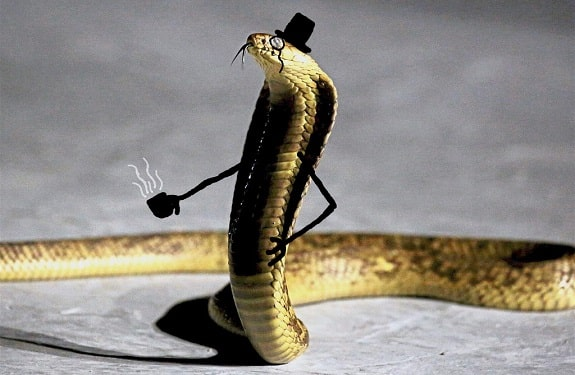